# Training a classifier with gaze features for calculating predictions of various activities

__UbiComp Assignment 02, Task 01:__
This third notebook trains a classifier with select features and corresponding labels.\
The features and labels are read from a given csv-file.

## Read data from a csv-file.

Note that the csv-file we are using here is generated by the FeatureCalculation Notebook.

In [2]:
import os
import pandas as pd

recording_location = './'

all_features_csv = os.path.join(recording_location, './Data/FeatureFiles/feature_list_all.csv')
df = pd.read_csv(all_features_csv)

In [1]:
# Uncomment the following lines to see all columns of the csv file (i.e., the features and labels)
# print("Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:")
# list(df.columns)

In [3]:
from IPython.display import display

read_df = df[df.label == 'Reading']
inspect_df = df[df.label == 'Inspection']
search_df = df[df.label == 'Search']

#print("Sample reading data:")
#display(read_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample inspection data:")
#display(inspect_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample search data:")
#display(search_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

## For the classification we used a modified version of [an SVM cassifier.](https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02)
First, we need to include some libraries 

In [4]:
#
#Importing the necessary packages and libaries
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np

## Let's store the labels and six selected features (among nineteen as denoted in the csv file)

In [18]:
features = df[["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB"]]
full_featueres = df.drop(columns=['label','duration','participant_id'])
labels = df ['label']

## This is how the features and labels look

In [19]:
print("Features:")
display(features.head(10))
print("Labels:")
display(labels.head(10))

Features:


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,freqDisPerSec,number_of_blinks,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB
0,250.882353,100,666,16554.228164,128.663235,0.050347,0.008784,0.174576,0.001026,0.032029,3.4,4,2291.500000,33,8967,0.4,0.484848,0.606061,369.479986
1,246.742857,100,900,23549.020168,153.456900,0.052125,0.013571,0.146709,0.000947,0.030780,3.5,0,0.000000,0,0,0.0,0.529412,0.529412,363.711018
2,237.257143,100,1067,36627.431933,191.382946,0.058595,0.028369,0.206161,0.002116,0.045998,3.5,0,0.000000,0,0,0.0,0.441176,0.558824,266.246748
3,293.137931,100,767,35208.551724,187.639419,0.047417,0.017613,0.114933,0.000828,0.028777,2.9,0,0.000000,0,0,0.0,0.500000,0.500000,319.553727
4,199.125000,100,566,12614.163462,112.312793,0.045997,0.027946,0.155588,0.000939,0.030645,4.0,5,1899.800000,33,9134,0.5,0.589744,0.487179,305.832090
5,262.562500,100,867,36411.415323,190.817754,0.044003,0.028132,0.104576,0.000563,0.023737,3.2,0,0.000000,0,0,0.0,0.516129,0.580645,236.757891
6,204.175000,100,733,16987.430128,130.335836,0.051403,0.007725,0.165634,0.001306,0.036133,4.0,0,0.000000,0,0,0.0,0.538462,0.512821,445.453567
7,221.540541,100,733,19568.977477,139.889161,0.046934,0.025305,0.131892,0.000824,0.028712,3.7,1,6266.000000,6266,6266,0.1,0.583333,0.500000,538.273012
8,430.095238,100,2567,322794.690476,568.150236,0.046509,0.004012,0.195179,0.001470,0.038339,2.1,3,3266.666667,33,6334,0.3,0.800000,0.450000,77.460002
9,227.805556,100,533,8651.246825,93.012079,0.048357,0.025565,0.264728,0.002175,0.046638,3.6,8,1162.625000,33,3600,0.8,0.914286,0.457143,132.320562


Labels:


0    Inspection
1    Inspection
2    Inspection
3    Inspection
4    Inspection
5    Inspection
6    Inspection
7    Inspection
8       Reading
9       Reading
Name: label, dtype: object

## Let's normalize the features (i.e., each column indivudally)

In [20]:
scaler = MaxAbsScaler()
scaler.fit(features)
scaled = scaler.transform(features)
scaled_features = pd.DataFrame(scaled, columns=features.columns)
print("Normalized Features:")
display(scaled_features.head(10))

Normalized Features:


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,freqDisPerSec,number_of_blinks,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB
0,0.412048,0.60241,0.144783,0.013814,0.117533,0.439555,0.296065,0.183228,0.030128,0.173574,0.755556,0.051282,0.365645,0.005266,0.981717,0.051282,0.527009,0.743802,0.238355
1,0.405249,0.60241,0.195652,0.019651,0.140181,0.455082,0.457426,0.153980,0.027823,0.166802,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.575448,0.649733,0.234633
2,0.389670,0.60241,0.231957,0.030564,0.174826,0.511570,0.956211,0.216378,0.062137,0.249273,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.479540,0.685829,0.171758
3,0.481448,0.60241,0.166739,0.029380,0.171407,0.413976,0.593685,0.120629,0.024320,0.155949,0.644444,0.000000,0.000000,0.000000,0.000000,0.000000,0.543478,0.613636,0.206147
4,0.327042,0.60241,0.123043,0.010526,0.102597,0.401578,0.941965,0.163299,0.027580,0.166071,0.888889,0.064103,0.303143,0.005266,1.000000,0.064103,0.641026,0.597902,0.197295
5,0.431232,0.60241,0.188478,0.030384,0.174310,0.384171,0.948243,0.109758,0.016547,0.128636,0.711111,0.000000,0.000000,0.000000,0.000000,0.000000,0.561010,0.712610,0.152735
6,0.335336,0.60241,0.159348,0.014175,0.119061,0.448781,0.260371,0.173843,0.038343,0.195813,0.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.585284,0.629371,0.287366
7,0.363857,0.60241,0.159348,0.016330,0.127787,0.409761,0.852955,0.138428,0.024209,0.155593,0.822222,0.012821,0.999840,0.999840,0.686008,0.012821,0.634058,0.613636,0.347245
8,0.706387,0.60241,0.558043,0.269361,0.519000,0.406048,0.135230,0.204852,0.043166,0.207765,0.466667,0.038462,0.521249,0.005266,0.693453,0.038462,0.869565,0.552273,0.049970
9,0.374147,0.60241,0.115870,0.007219,0.084966,0.422181,0.861712,0.277847,0.063877,0.252740,0.800000,0.102564,0.185515,0.005266,0.394132,0.102564,0.993789,0.561039,0.085361


## Let's split the data and have two sets, one for training the model and one for testing it.

In [8]:
# feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=0.8, random_state = 0, stratify=labels)

# Uncomment the following line if you want to work with normalized features. You will note how the accuracy and confusion matrix changes
feature_train, feature_test, label_train, label_test = train_test_split(scaled_features, labels, train_size=0.8, random_state = 0, stratify=labels)

## Find the most important features

In [ ]:
# normalize the data
scaler = MaxAbsScaler()
scaler.fit(full_featueres)
scaled = scaler.transform(full_featueres)
scaled_full_features = pd.DataFrame(scaled, columns=full_featueres.columns)
print("Normalized Features:")
display(scaled_full_features.head(10))

## We can work with different SVM-kernels:

In [9]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

## Lets collect the predictions from test data. . .

In [10]:
linear_pred = linear.predict(feature_test)
poly_pred = poly.predict(feature_test)
rbf_pred = rbf.predict(feature_test)
sig_pred = sig.predict(feature_test)

## . . . and have a look at the accuracy of each one:

In [11]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(feature_test, label_test)
accuracy_poly = poly.score(feature_test, label_test)
accuracy_rbf = rbf.score(feature_test, label_test)
accuracy_sig = sig.score(feature_test, label_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)
      

Accuracy Linear Kernel: 0.8701298701298701
Accuracy Polynomial Kernel: 0.8831168831168831
Accuracy Radial Basis Kernel: 0.8701298701298701
Accuracy Sigmoid Kernel: 0.3246753246753247


## This is how the confusion matrix of each predictor looks like

In [12]:
# creating a confusion matrix
cm_lin = confusion_matrix(label_test, linear_pred)
cm_poly = confusion_matrix(label_test, poly_pred)
cm_rbf = confusion_matrix(label_test, rbf_pred)
cm_sig = confusion_matrix(label_test, sig_pred)

print("CM Linear:")
print(cm_lin)
print("CM Polynomial:")
print(cm_poly)
print("CM Radial:")
print(cm_rbf)
print("CM Sigmoid:")
print(cm_sig)

CM Linear:
[[22  0  4]
 [ 1 25  0]
 [ 5  0 20]]
CM Polynomial:
[[23  0  3]
 [ 1 25  0]
 [ 5  0 20]]
CM Radial:
[[22  0  4]
 [ 1 25  0]
 [ 5  0 20]]
CM Sigmoid:
[[14  7  5]
 [ 0  9 17]
 [ 3 20  2]]


## A more colorful confusion matrix for the linear predictor

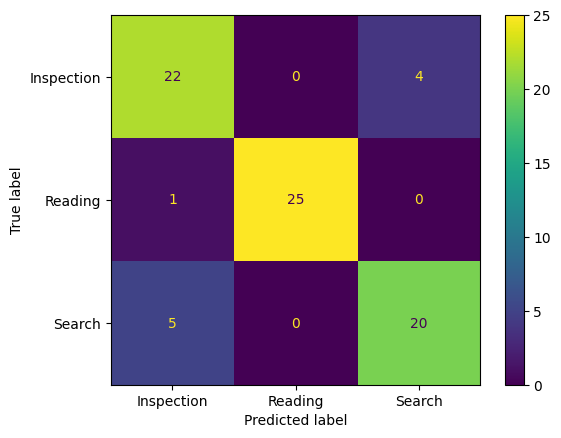

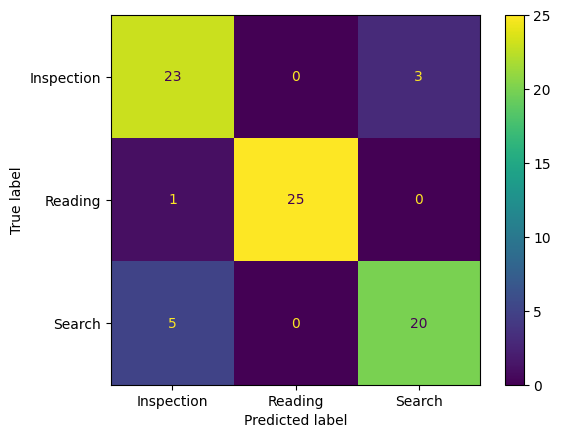

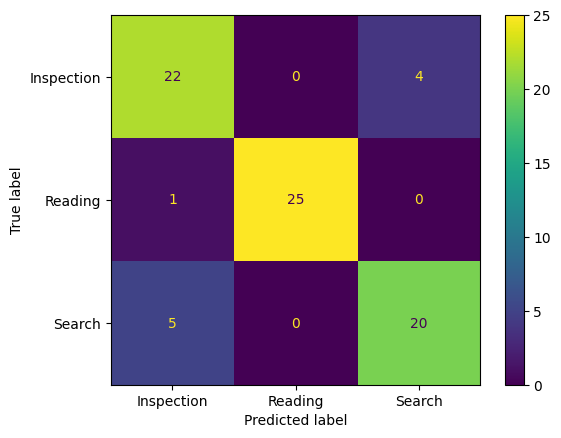

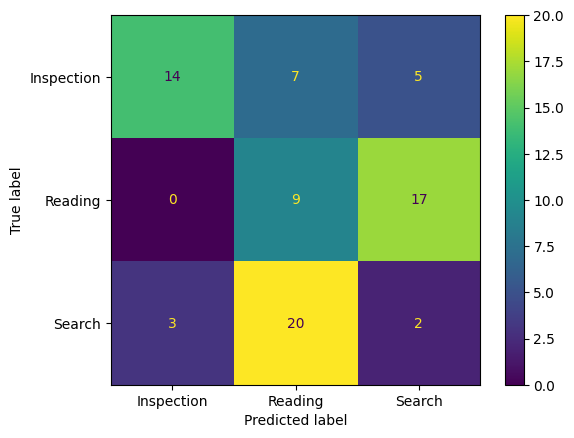

In [13]:
ConfusionMatrixDisplay.from_estimator(linear, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(poly, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(rbf, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(sig, feature_test, label_test)

## Finally, let's make a cross check

In [14]:
feature_test.head()

,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
190,0.471934,0.181304,0.028288,0.504658,0.657468,0.207384
298,0.496951,0.217391,0.036663,0.608696,0.490909,0.069528
162,0.352584,0.108696,0.009066,0.625823,0.669421,0.040469
188,0.337210,0.115870,0.012460,0.528790,0.597052,0.170942
92,0.343671,0.137826,0.015631,0.683230,0.841558,0.076578


In [15]:
linear.predict(np.array(features.iloc[59]).reshape(1,-1))

/home/kai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Inspection'], dtype=object)

## Let's detect the label (i.e., the activity) of some new features (i.e., that are extracted from a new stream of eye tracking data):

In [16]:
print("New Feature:")
# NOTE that we use a particular feature from the test dataset but this can be replaced with new data e.g., that arrives online and was not included in training or testing the classifier
new_feature = feature_test.tail(2)
display(new_feature)

new_linear_pred = linear.predict_proba(new_feature)
new_linear_pred_2 = linear.predict(new_feature)
print("New Linear Prediction:")
display(new_linear_pred)
display(new_linear_pred_2)

new_poly_pred_2 = poly.predict(new_feature)
new_poly_pred = poly.predict_proba(new_feature)
print("New Poly Prediction:")
display(new_poly_pred)
display(new_poly_pred_2)

new_rbf_pred_2 = rbf.predict(new_feature)
new_rbf_pred = rbf.predict_proba(new_feature)
print("New RBF Prediction:")
display(new_rbf_pred)
display(new_rbf_pred_2)

new_sig_pred_2 = sig.predict(new_feature)
new_sig_pred = sig.predict_proba(new_feature)
print("New Sig Prediction:")
display(new_sig_pred)
display(new_sig_pred_2)

New Feature:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
121,0.401009,0.130435,0.012815,0.905797,0.409091,0.068803
195,0.515043,0.159565,0.021214,0.836120,0.566434,0.079461


New Linear Prediction:


array([[0.00321739, 0.98651594, 0.01026667],
       [0.01872547, 0.96658689, 0.01468764]])

array(['Reading', 'Reading'], dtype=object)

New Poly Prediction:


array([[0.00268564, 0.98184189, 0.01547247],
       [0.00676798, 0.9868095 , 0.00642251]])

array(['Reading', 'Reading'], dtype=object)

New RBF Prediction:


array([[0.00444044, 0.97982795, 0.01573161],
       [0.01600542, 0.96911184, 0.01488274]])

array(['Reading', 'Reading'], dtype=object)

New Sig Prediction:


array([[0.39208723, 0.22737389, 0.38053888],
       [0.35077538, 0.4445957 , 0.20462891]])

array(['Reading', 'Search'], dtype=object)